In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from functools import partial
%matplotlib inline

In [2]:
def projectile_kernel(vartuple, t, g=1.0, gamma=0.0):
    x, vx, y, vy, z, vz = vartuple
    derivatives = [vx, -gamma*vx, vy, -gamma*vy, vz, -g-gamma*vz]
    return derivatives

In [3]:
def find_landing_pos(sol, t):
    x, vx, y, vy, z, vz = np.transpose(sol)
    tidx = len(filter(lambda h: h>0, z))
    landed_t = t[tidx] - z[tidx]*(t[tidx+1]-t[tidx])/(z[tidx+1]-z[tidx])
    landed_x = x[tidx] - z[tidx]*(x[tidx+1]-x[tidx])/(z[tidx+1]-z[tidx])
    landed_y = y[tidx] - z[tidx] * (y[tidx + 1] - y[tidx]) / (z[tidx + 1] - z[tidx])
    return landed_x, landed_y, landed_t, tidx

In [4]:
var0 = [0, 10.0, 0., 0., 0, 10.0]

In [5]:
t = np.linspace(0, 100, 1001)

In [6]:
sol = odeint(partial(projectile_kernel, g=1.0, gamma=0.01), var0, t)

In [7]:
_, _, _, tidx = find_landing_pos(sol, t)

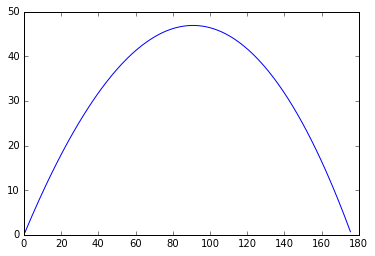

In [8]:
plt.plot(sol[:(tidx+1), 0], sol[:(tidx+1), 4])

In [9]:
find_landing_pos(sol, t)

(176.13331173005966, 0.0, 19.374664290306566, 193)